# Краткий обзор данных

In [229]:
# !pip install scipy

In [230]:
# Импорт библиотечных модулей
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Считываем исходные данные из CSV файла в DataFrame df
df = pd.read_csv('HR_Analytics.csv')

# Отображаем первые десять строк для наглядной проверки корректности загрузки
display(df.head(10)) #tail()

# Выводим информацю о датафрейме
print(df.info())

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0
5,RM973,18,18-25,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,...,3,80,0,0,5,4,0,0,0,0.0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,...,3,80,0,0,2,4,0,0,0,0.0
7,RM1312,18,18-25,No,Non-Travel,1431,Research & Development,14,3,Medical,...,3,80,0,0,4,1,0,0,0,0.0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,...,4,80,0,0,2,2,0,0,0,0.0
9,RM150,19,18-25,No,Travel_Rarely,1181,Research & Development,3,1,Medical,...,4,80,0,1,3,3,1,0,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

# Предобработка данных

In [231]:
# Изначальный объём данных
data_len_start=df.shape[0]
print("Строк в исходном наборе:",data_len_start)
print("Пустых ячеек:", df.isna().sum().sum())

Строк в исходном наборе: 1480
Пустых ячеек: 57


# ID Сотрудника (EmpID)

In [232]:
print(df['EmpID'].value_counts())
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

# Замечаем, что некоторые ID повторяются

# Находим все дубликаты
duplicates = df[df.duplicated('EmpID', keep=False)]
duplicates_sorted = duplicates.sort_values('EmpID')

print("\nВсе дубликаты EmpID:")
print(duplicates_sorted[['EmpID', 'EmployeeNumber', 'Age', 'Department']].to_string())

prev_len = len(df)

# Удаляем лишние строки
df = df.drop_duplicates(subset='EmpID', keep='first')

print(f"\nБыло записей: {prev_len}")
print(f"Стало записей: {len(df)}")
print(f"Удалено дубликатов: {prev_len - len(df)}")

EmpID
RM1468    2
RM1465    2
RM1470    2
RM1461    2
RM1464    2
         ..
RM939     1
RM967     1
RM1010    1
RM1302    1
RM1210    1
Name: count, Length: 1470, dtype: int64
Пропуски: 0

Все дубликаты EmpID:
       EmpID  EmployeeNumber  Age              Department
327   RM1461            2054   29  Research & Development
328   RM1461            2054   29  Research & Development
1336  RM1462            2055   50                   Sales
1335  RM1462            2055   50                   Sales
954   RM1463            2056   39                   Sales
952   RM1463            2056   39                   Sales
457   RM1464            2057   31  Research & Development
458   RM1464            2057   31  Research & Development
161   RM1465            2060   26                   Sales
162   RM1465            2060   26                   Sales
802   RM1466            2061   36  Research & Development
803   RM1466            2061   36  Research & Development
953   RM1467            2062   39 

## Возраст

Age
35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
23    14
56    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64
Пропуски: 0


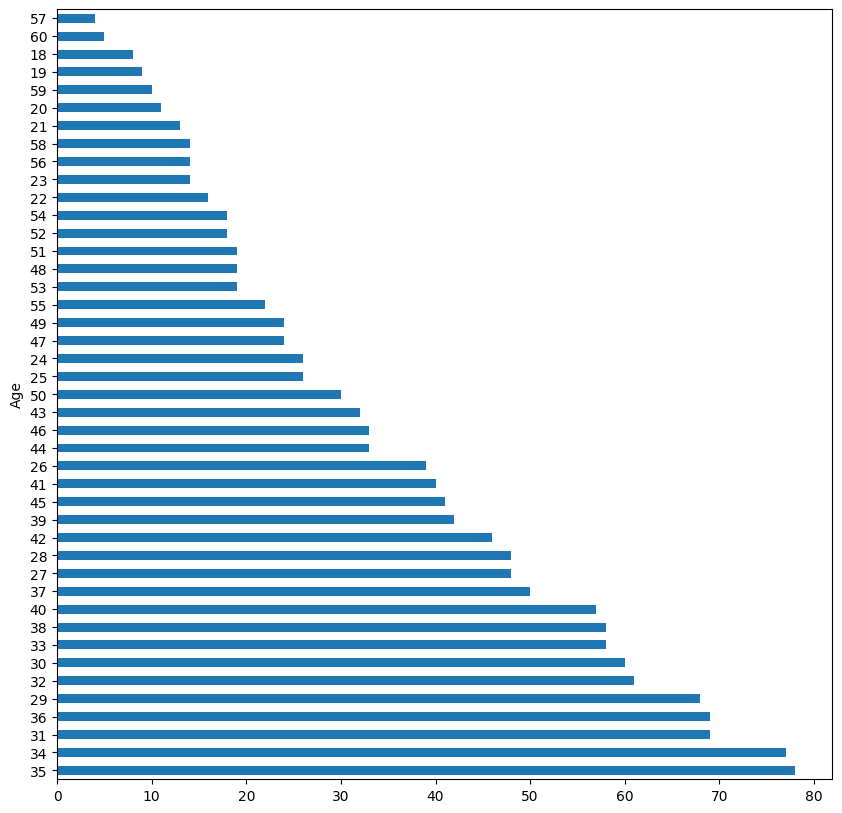

In [233]:
print(df['Age'].value_counts())
df['Age'].value_counts().plot(kind='barh', figsize=(10, 10))
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

## Возрастная группа

AgeGroup
26-35    606
36-45    468
46-55    226
18-25    123
55+       47
Name: count, dtype: int64
Пропуски: 0


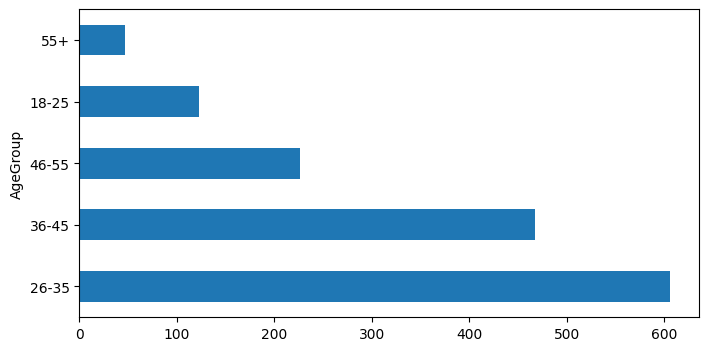

In [234]:
print(df['AgeGroup'].value_counts())
df['AgeGroup'].value_counts().plot(kind='barh', figsize=(8, 4))
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

## Уволился ли сотрудник

Attrition
No     1233
Yes     237
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='Attrition'>

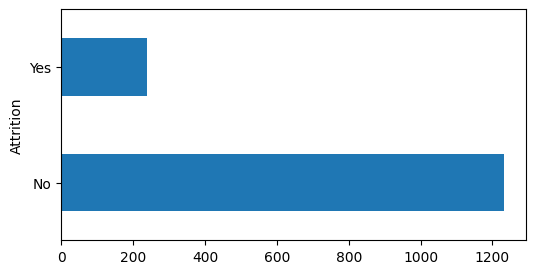

In [235]:
print(df['Attrition'].value_counts())
print("Пропуски:", sum(pd.isnull(df['Attrition'])))

df['Attrition'].value_counts().plot(kind='barh', figsize=(6, 3))

## Частота командировок

BusinessTravel
Travel_Rarely        1036
Travel_Frequently     277
Non-Travel            150
TravelRarely            7
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='BusinessTravel'>

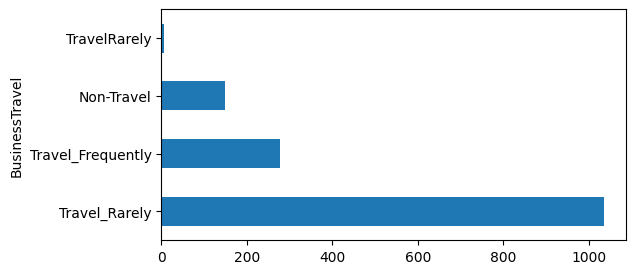

In [236]:
print(df['BusinessTravel'].value_counts())
print("Пропуски:", sum(pd.isnull(df['BusinessTravel'])))

df['BusinessTravel'].value_counts().plot(kind='barh', figsize=(6, 3))

BusinessTravel
Travel Rarely        1043
Travel Frequently     277
Non Travel            150
Name: count, dtype: int64


<Axes: ylabel='BusinessTravel'>

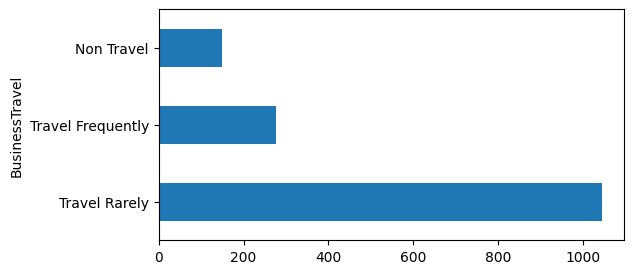

In [237]:
# Заменим все "Travel_Rarely" и "TravelRarely" на "Travel Rarely"
df["BusinessTravel"] = df["BusinessTravel"].replace(['Travel_Rarely', 'TravelRarely'], 'Travel Rarely')
# "Travel_Frequently" на "Travel Frequently"
df["BusinessTravel"] = df["BusinessTravel"].replace('Travel_Frequently', 'Travel Frequently')
# А "Non-Travel" на "Non Travel"
df["BusinessTravel"] = df["BusinessTravel"].replace('Non-Travel', 'Non Travel')

print(df['BusinessTravel'].value_counts())
df['BusinessTravel'].value_counts().plot(kind='barh', figsize=(6, 3))

# Ежедневная ставка в $ (Daily Rate)

DailyRate
691     6
1082    5
329     5
408     5
1329    5
       ..
1435    1
818     1
1429    1
1499    1
1457    1
Name: count, Length: 886, dtype: int64
Пропуски: 0


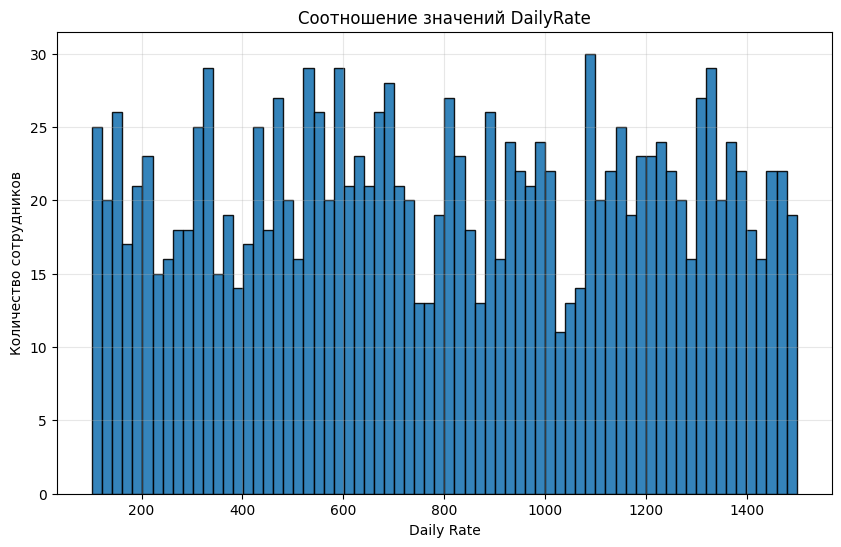

In [238]:
print(df['DailyRate'].value_counts())
# df['DailyRate'].value_counts().plot(kind='barh', figsize=(6, 20))
print("Пропуски:", sum(pd.isnull(df['DailyRate'])))

plt.figure(figsize=(10, 6))
plt.hist(df['DailyRate'], bins=70, edgecolor='black', alpha=0.9)
plt.title('Соотношение значений DailyRate')
plt.xlabel('Daily Rate')
plt.ylabel('Количество сотрудников')
plt.grid(alpha=0.3)
plt.show()

# Отдел

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
Пропуски: 0


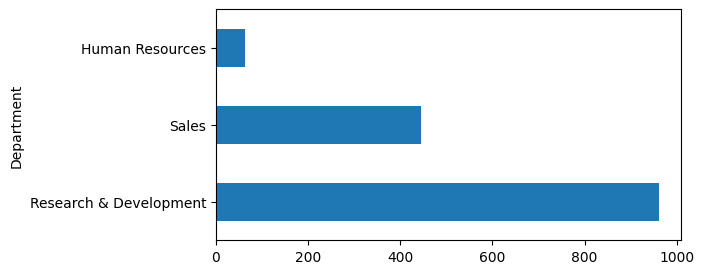

In [239]:
print(df['Department'].value_counts())
df['Department'].value_counts().plot(kind='barh', figsize=(6, 3))
print("Пропуски:", sum(pd.isnull(df['Department'])))

# Расстояние от офиса до дома в милях(?)

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
18     26
15     26
26     25
20     25
25     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: count, dtype: int64
Пропуски: 0


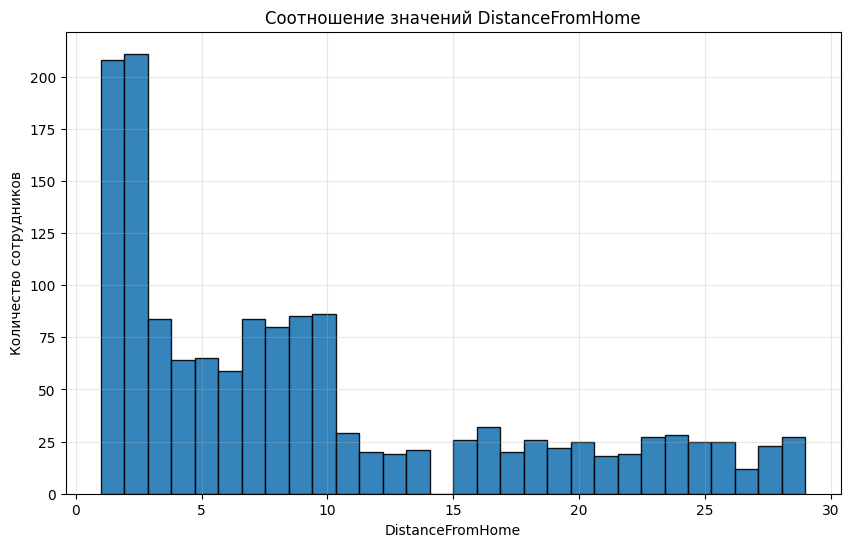

In [240]:
print(df['DistanceFromHome'].value_counts())
print("Пропуски:", sum(pd.isnull(df['DistanceFromHome'])))

plt.figure(figsize=(10, 6))
plt.hist(df['DistanceFromHome'], bins=30, edgecolor='black', alpha=0.9)
plt.title('Соотношение значений DistanceFromHome')
plt.xlabel('DistanceFromHome')
plt.ylabel('Количество сотрудников')
plt.grid(alpha=0.3)
plt.show()

# Количество высших(?) образований

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='Education'>

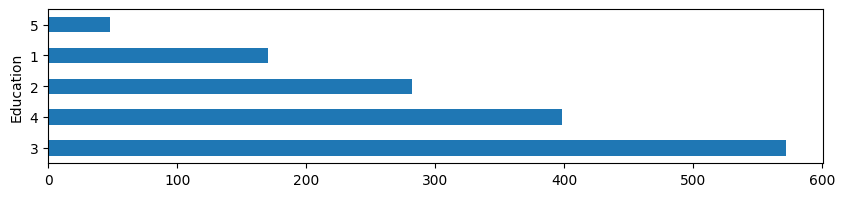

In [241]:
print(df['Education'].value_counts())
print("Пропуски:", sum(pd.isnull(df['Education'])))

df['Education'].value_counts().plot(kind='barh', figsize=(10, 2))

# Область образования

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='EducationField'>

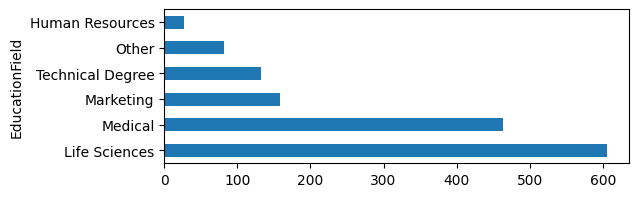

In [242]:
print(df['EducationField'].value_counts())
print("Пропуски:", sum(pd.isnull(df['EducationField'])))

df['EducationField'].value_counts().plot(kind='barh', figsize=(6, 2))


# Количество сотрудников (EmployeeCount)

In [243]:
print(df['EmployeeCount'].value_counts())
print("Пропуски:", sum(pd.isnull(df['EmployeeCount'])))

# Не несет никакой ценности, т.к. в каждом сотруднике один сотрудник :)
# => удаляем столбец

df = df.drop('EmployeeCount', axis=1)

EmployeeCount
1    1470
Name: count, dtype: int64
Пропуски: 0


# Номер сотрудника (EmployeeNumber)

In [244]:
print(df['EmployeeNumber'].value_counts())
print("Пропуски:", sum(pd.isnull(df['EmployeeNumber'])))

# Не несет никакой ценности, т.к. это просто порядковый номер сотрудника, а у нас уже есть EmpID 
# => удаляем столбец



EmployeeNumber
405     1
411     1
614     1
1012    1
1156    1
       ..
549     1
573     1
732     1
1233    1
1697    1
Name: count, Length: 1470, dtype: int64
Пропуски: 0


# Оценка сотрудником условий труда (EnvironmentSatisfaction)

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='EnvironmentSatisfaction'>

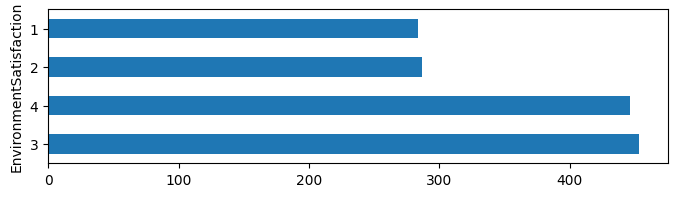

In [245]:
print(df['EnvironmentSatisfaction'].value_counts())
print("Пропуски:", sum(pd.isnull(df['EnvironmentSatisfaction'])))

df['EnvironmentSatisfaction'].value_counts().plot(kind='barh', figsize=(8, 2))


# Пол сотрудника (Gender)

Gender
Male      882
Female    588
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='Gender'>

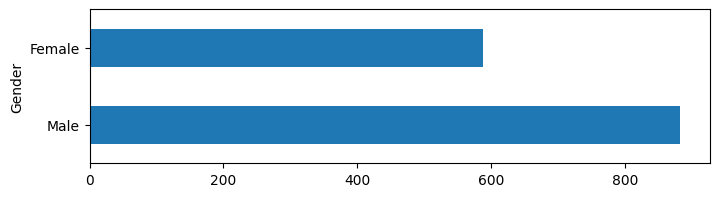

In [246]:
print(df['Gender'].value_counts())
print("Пропуски:", sum(pd.isnull(df['Gender'])))

df['Gender'].value_counts().plot(kind='barh', figsize=(8, 2))


# Почасовая оплата (HourlyRate)

HourlyRate
66    29
84    28
98    28
48    28
42    28
      ..
31    15
68    14
53    14
38    13
34    12
Name: count, Length: 71, dtype: int64
Пропуски: 0


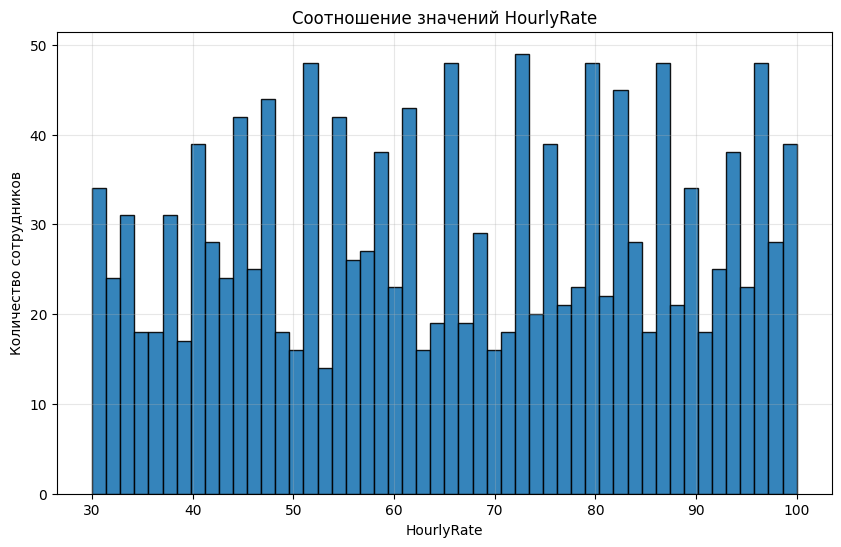

In [247]:
print(df['HourlyRate'].value_counts())
print("Пропуски:", sum(pd.isnull(df['HourlyRate'])))

plt.figure(figsize=(10, 6))
plt.hist(df['HourlyRate'], bins=50, edgecolor='black', alpha=0.9)
plt.title('Соотношение значений HourlyRate')
plt.xlabel('HourlyRate')
plt.ylabel('Количество сотрудников')
plt.grid(alpha=0.3)
plt.show()


# Вовлеченность сотрудника (JobInvolvement)

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='JobInvolvement'>

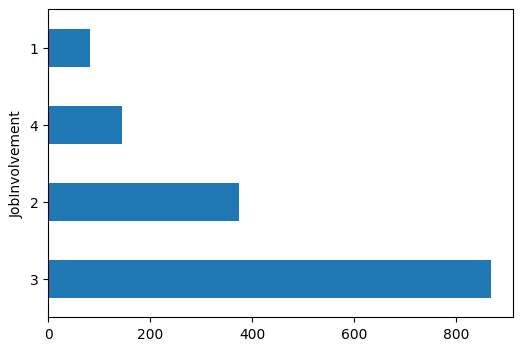

In [248]:
print(df['JobInvolvement'].value_counts())
print("Пропуски:", sum(pd.isnull(df['JobInvolvement'])))

df['JobInvolvement'].value_counts().plot(kind='barh', figsize=(6, 4))


# Уровень работы - грейд сотрудника (JobLevel)

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='JobLevel'>

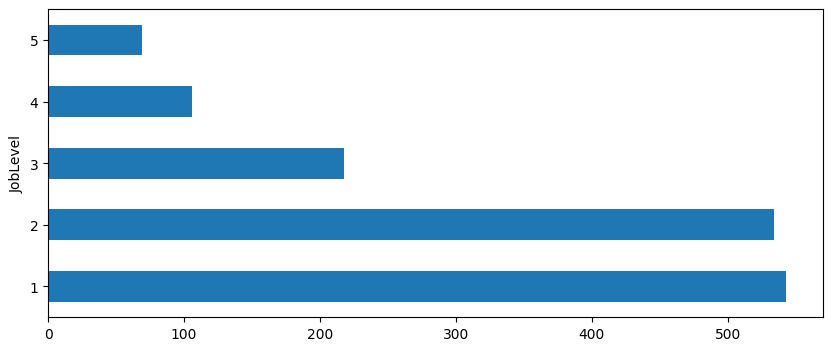

In [249]:
print(df['JobLevel'].value_counts())
print("Пропуски:", sum(pd.isnull(df['JobLevel'])))

df['JobLevel'].value_counts().plot(kind='barh', figsize=(10, 4))


# Должность сотрудника (JobRole)

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='JobRole'>

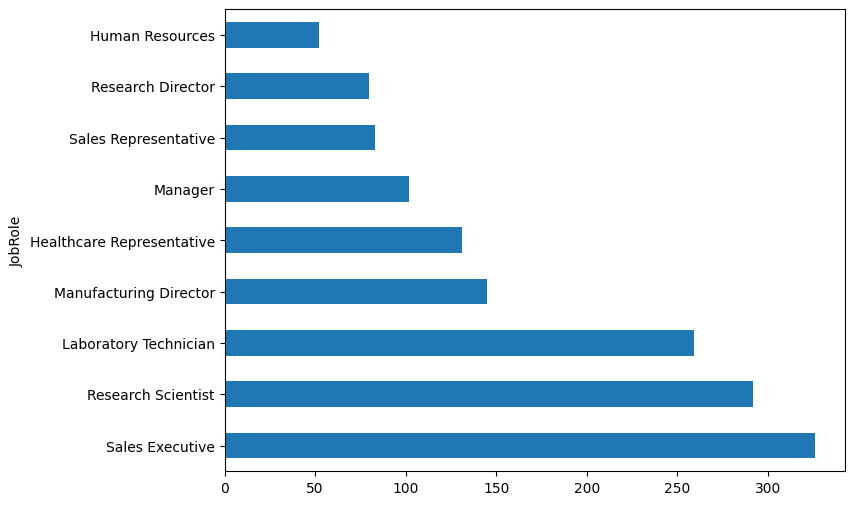

In [250]:
print(df['JobRole'].value_counts())
print("Пропуски:", sum(pd.isnull(df['JobRole'])))

df['JobRole'].value_counts().plot(kind='barh', figsize=(8, 6))


# Удовлетворенность работой (JobSatisfaction)

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='JobSatisfaction'>

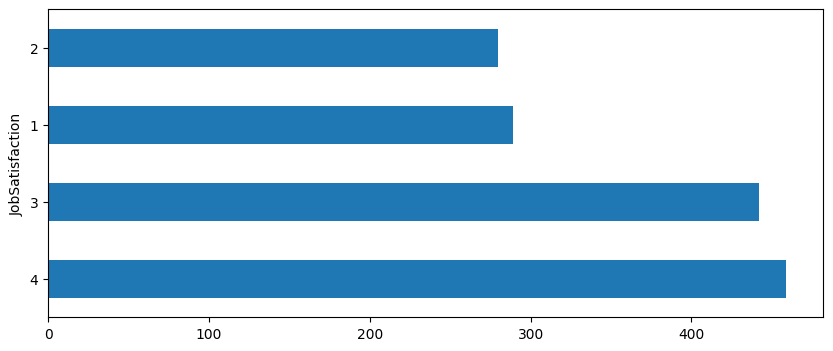

In [251]:
print(df['JobSatisfaction'].value_counts())
print("Пропуски:", sum(pd.isnull(df['JobSatisfaction'])))

df['JobSatisfaction'].value_counts().plot(kind='barh', figsize=(10, 4))


# Семейное положение (MaritalStatus)

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='MaritalStatus'>

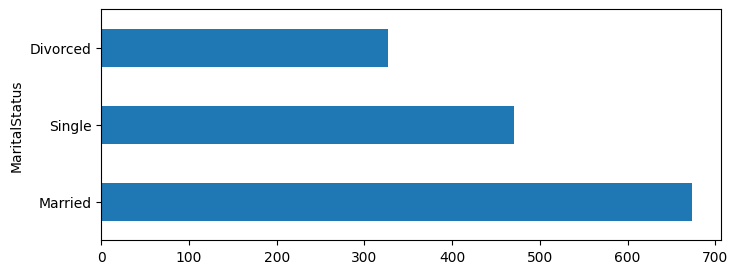

In [252]:
print(df['MaritalStatus'].value_counts())
print("Пропуски:", sum(pd.isnull(df['MaritalStatus'])))

df['MaritalStatus'].value_counts().plot(kind='barh', figsize=(8, 3))


# Месячная ФАКТИЧЕСКАЯ зарплата (MonthlyIncome)

MonthlyIncome
2342     4
2404     3
2380     3
2451     3
6142     3
        ..
3346     1
5660     1
19246    1
10552    1
1611     1
Name: count, Length: 1303, dtype: int64
Пропуски: 0


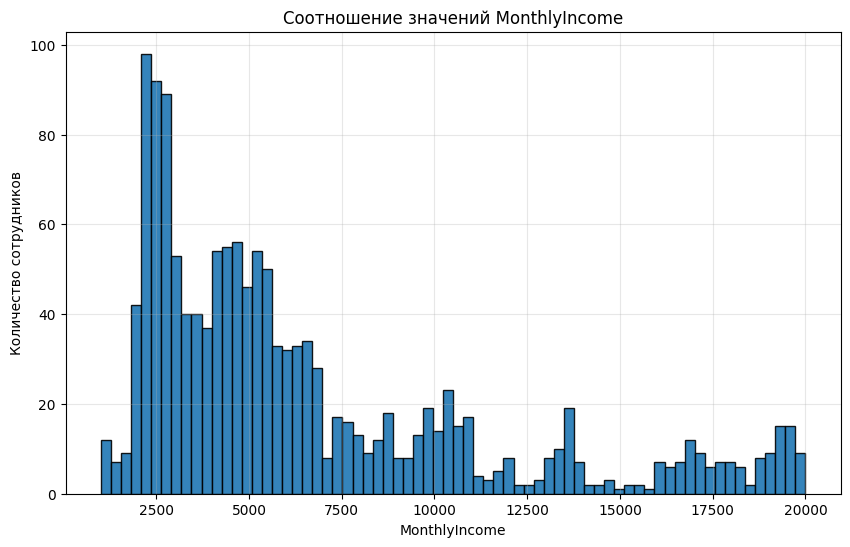

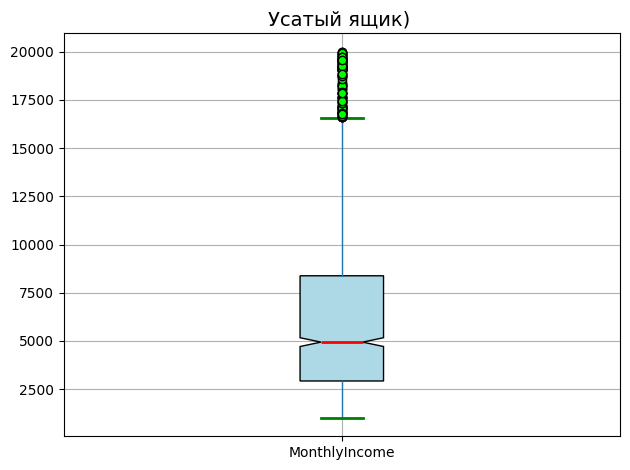

In [ ]:
# ЗП после всех вычетов и надбавок

print(df['MonthlyIncome'].value_counts())
print("Пропуски:", sum(pd.isnull(df['MonthlyIncome'])))

plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyIncome'], bins=70, edgecolor='black', alpha=0.9)
plt.title('Соотношение значений MonthlyIncome')
plt.xlabel('MonthlyIncome')
plt.ylabel('Количество сотрудников')
plt.grid(alpha=0.3)
plt.show()

df[['MonthlyIncome']].boxplot(
patch_artist=True, 
boxprops={'facecolor': 'lightblue'}, 
medianprops={'color': 'red', 'linewidth': 2}, 
capprops={'color': 'green', 'linewidth': 2}, 
flierprops={'marker': 'o', 'markerfacecolor': 'lime'},
notch=True, # Оценка доверительного интервала медианы
)

plt.title('Усатый ящик) ', fontsize=14)
plt.tight_layout()
plt.show()

# Диапозон ЗП (SalarySlab)

SalarySlab
Upto 5k    749
5k-10k     440
10k-15k    148
15k+       133
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='SalarySlab'>

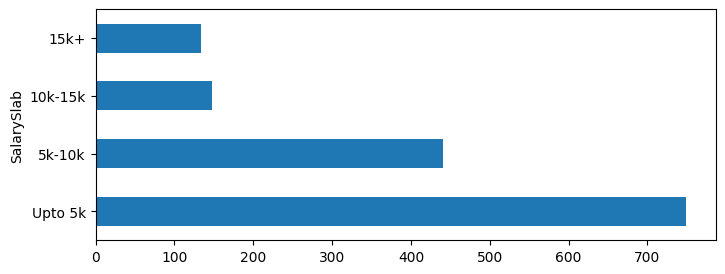

In [254]:
print(df['SalarySlab'].value_counts())
print("Пропуски:", sum(pd.isnull(df['SalarySlab'])))

df['SalarySlab'].value_counts().plot(kind='barh', figsize=(8, 3))


# Месячная зарплата - Оклад (MonthlyRate)

MonthlyRate
9150     3
4223     3
19373    2
24444    2
10494    2
        ..
26076    1
12023    1
22456    1
22577    1
21624    1
Name: count, Length: 1427, dtype: int64
Пропуски: 0


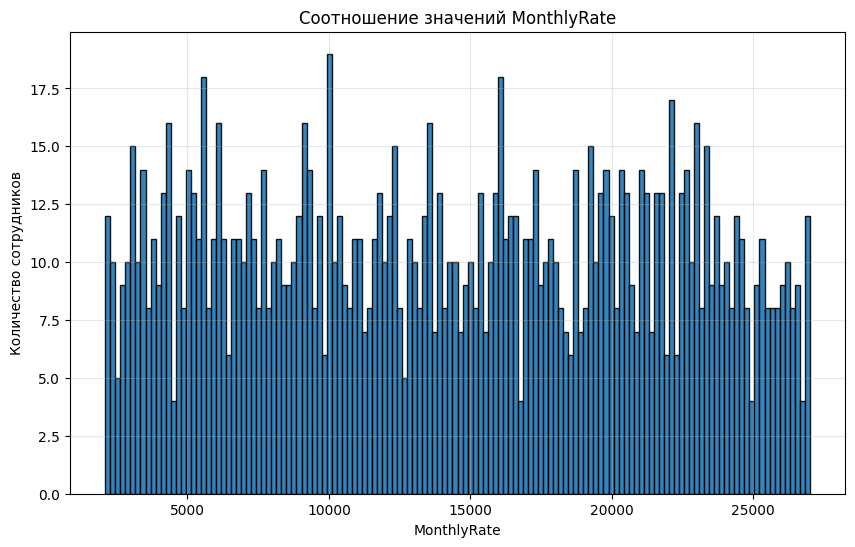

In [255]:
print(df['MonthlyRate'].value_counts())
print("Пропуски:", sum(pd.isnull(df['MonthlyRate'])))

plt.figure(figsize=(10, 6))
plt.hist(df['MonthlyRate'], bins=140, edgecolor='black', alpha=0.9)
plt.title('Соотношение значений MonthlyRate')
plt.xlabel('MonthlyRate')
plt.ylabel('Количество сотрудников')
plt.grid(alpha=0.3)
plt.show()

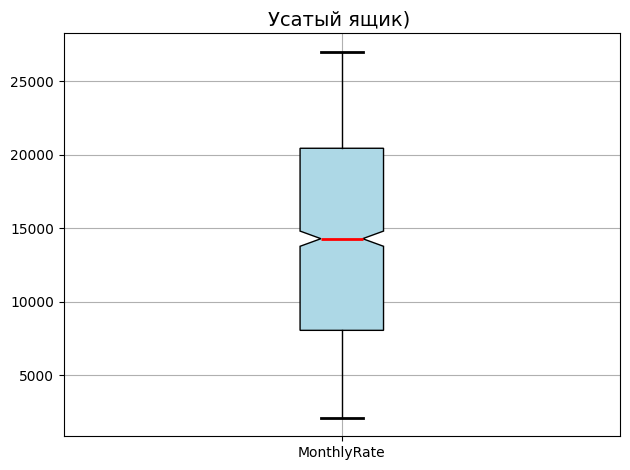

In [359]:
df[['MonthlyRate']].boxplot(
patch_artist=True,
boxprops={'facecolor': 'lightblue'}, 
medianprops={'color': 'red', 'linewidth': 2}, 
whiskerprops={'color': 'black'}, 
capprops={'linewidth': 2}, 
notch=True, # Оценка доверительного интервала медианы
)

plt.title('Усатый ящик) ', fontsize=14)
plt.tight_layout()
plt.show()

# Количество мест работы сотрудника (NumCompaniesWorked)

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='NumCompaniesWorked'>

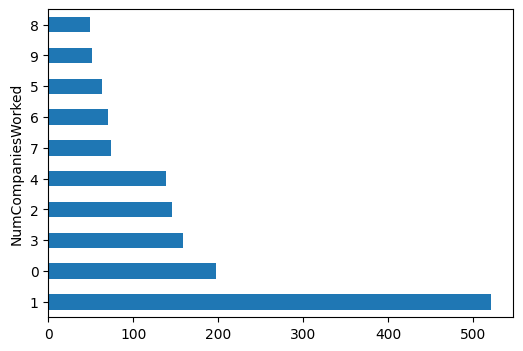

In [256]:
print(df['NumCompaniesWorked'].value_counts())
print("Пропуски:", sum(pd.isnull(df['NumCompaniesWorked'])))

df['NumCompaniesWorked'].value_counts().plot(kind='barh', figsize=(6, 4))

# Сотруднки старше 18 лет (Over18)

In [257]:
print(df['Over18'].value_counts())
print("Пропуски:", sum(pd.isnull(df['Over18'])))

# Данный столбец не имеет смысла, т.к. в нем все значения одинаковые
# => удаляем

df = df.drop('Over18', axis=1)

Over18
Y    1470
Name: count, dtype: int64
Пропуски: 0


# Работает ли сотрудник сверхурочно / перерабатывает ли (OverTime)

OverTime
No     1054
Yes     416
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='OverTime'>

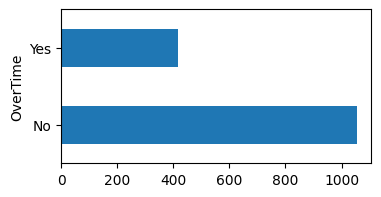

In [258]:
print(df['OverTime'].value_counts())
print("Пропуски:", sum(pd.isnull(df['OverTime'])))

df['OverTime'].value_counts().plot(kind='barh', figsize=(4, 2))

# Процент повышения ЗП  сотрудника за последний период (PercentSalaryHike)

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='PercentSalaryHike'>

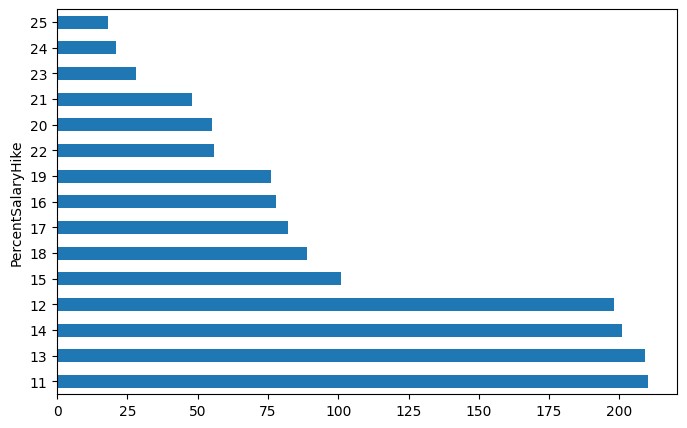

In [259]:
print(df['PercentSalaryHike'].value_counts())
print("Пропуски:", sum(pd.isnull(df['PercentSalaryHike'])))

df['PercentSalaryHike'].value_counts().plot(kind='barh', figsize=(8, 5))

# Оценка эфективности сотрудника (PerformanceRating)

PerformanceRating
3    1244
4     226
Name: count, dtype: int64
Пропуски: 0


'\n1 - Не соответствует ожиданиям (Below Expectations)\n\n2 - Соответствует ожиданиям (Meets Expectations)\n\n3 - Превышает ожидания (Exceeds Expectations)\n\n4 - Значительно превышает ожидания (Outstanding)\n\n5 - Выдающиеся результаты (Exceptional) в некоторых компаниях\n'

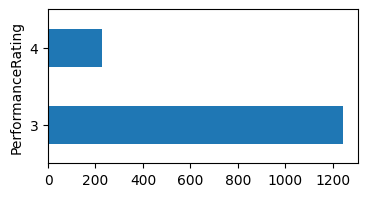

In [260]:
# Четырехбальная система оценивания эфективности сотрудника 

print(df['PerformanceRating'].value_counts())
print("Пропуски:", sum(pd.isnull(df['PerformanceRating'])))

df['PerformanceRating'].value_counts().plot(kind='barh', figsize=(4, 2))

"""
1 - Не соответствует ожиданиям (Below Expectations)

2 - Соответствует ожиданиям (Meets Expectations)

3 - Превышает ожидания (Exceeds Expectations)

4 - Значительно превышает ожидания (Outstanding)

5 - Выдающиеся результаты (Exceptional) в некоторых компаниях
"""

# Удовлетворенность взаимоотношениями (RelationshipSatisfaction)

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='RelationshipSatisfaction'>

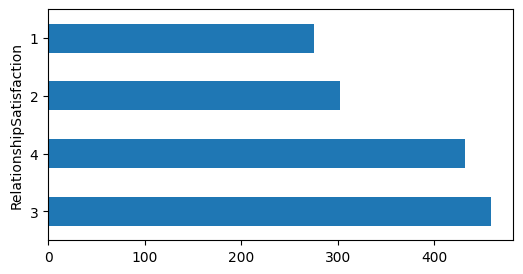

In [261]:
print(df['RelationshipSatisfaction'].value_counts())
print("Пропуски:", sum(pd.isnull(df['RelationshipSatisfaction'])))

df['RelationshipSatisfaction'].value_counts().plot(kind='barh', figsize=(6, 3))

# Стандартные часы (StandardHours)

In [262]:
# Количество часов за 2 недели

print(df['StandardHours'].value_counts())
print("Пропуски:", sum(pd.isnull(df['StandardHours'])))

# Данный столбец не имеет смысла, т.к. в нем все значения одинаковые
# => удаляем

df = df.drop('StandardHours', axis=1)

StandardHours
80    1470
Name: count, dtype: int64
Пропуски: 0


#  (StockOptionLevel)

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='StockOptionLevel'>

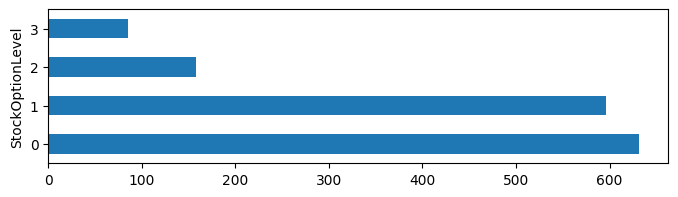

In [263]:
print(df['StockOptionLevel'].value_counts())
print("Пропуски:", sum(pd.isnull(df['StockOptionLevel'])))

df['StockOptionLevel'].value_counts().plot(kind='barh', figsize=(8, 2))

# Общий стаж работы (TotalWorkingYears)

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
1      81
7      81
4      63
12     48
3      42
15     40
16     37
13     36
11     36
21     34
17     33
14     31
2      31
20     30
18     27
23     22
19     22
22     21
24     18
26     14
25     14
28     14
0      11
29     10
31      9
32      9
27      7
30      7
33      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='TotalWorkingYears'>

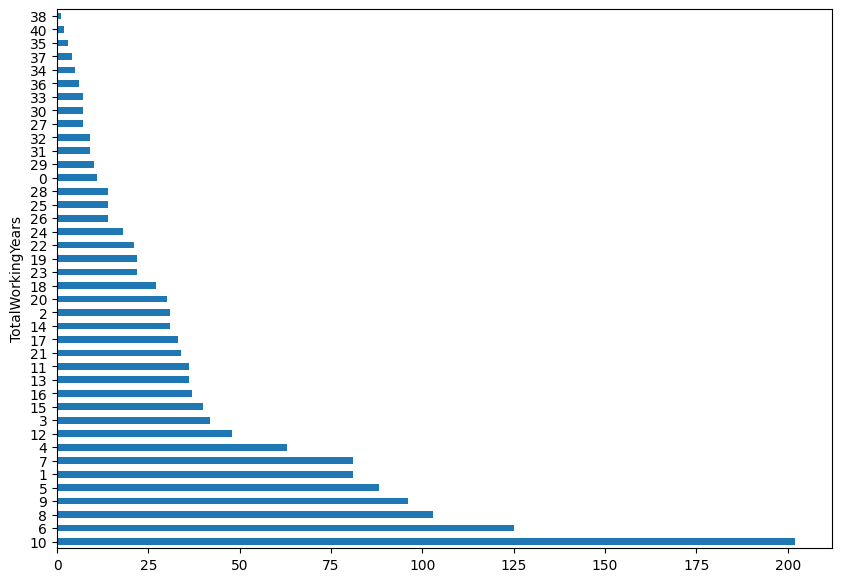

In [264]:
print(df['TotalWorkingYears'].value_counts())
print("Пропуски:", sum(pd.isnull(df['TotalWorkingYears'])))

df['TotalWorkingYears'].value_counts().plot(kind='barh', figsize=(10, 7))

# Время на обучение за последний год (TrainingTimesLastYear)

TrainingTimesLastYear
2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='TrainingTimesLastYear'>

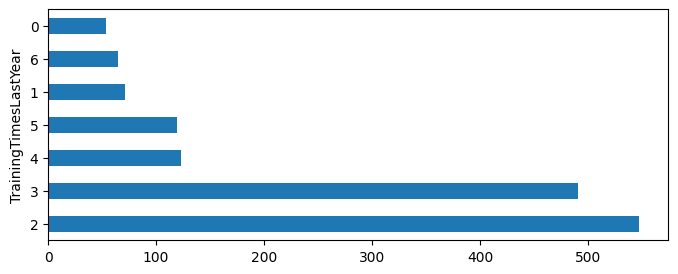

In [265]:
print(df['TrainingTimesLastYear'].value_counts())
print("Пропуски:", sum(pd.isnull(df['TrainingTimesLastYear'])))

df['TrainingTimesLastYear'].value_counts().plot(kind='barh', figsize=(8, 3))

# Баланс между работой и личной жизнью (WorkLifeBalance)

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='WorkLifeBalance'>

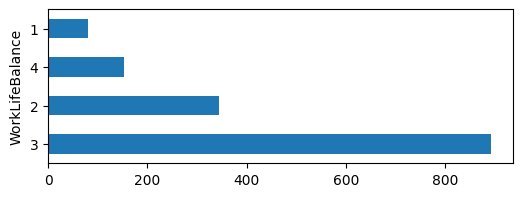

In [266]:
# Оценка сотрудником того, насколько хорошо он может балансировать между рабочими обязанностями и личной жизнью.

print(df['WorkLifeBalance'].value_counts())
print("Пропуски:", sum(pd.isnull(df['WorkLifeBalance'])))

df['WorkLifeBalance'].value_counts().plot(kind='barh', figsize=(6, 2))

# Стаж в компании (YearsAtCompany)

YearsAtCompany
5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
21     14
12     14
18     13
16     12
19     11
17      9
24      6
33      5
26      4
25      4
32      3
31      3
27      2
23      2
29      2
36      2
30      1
34      1
37      1
40      1
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='YearsAtCompany'>

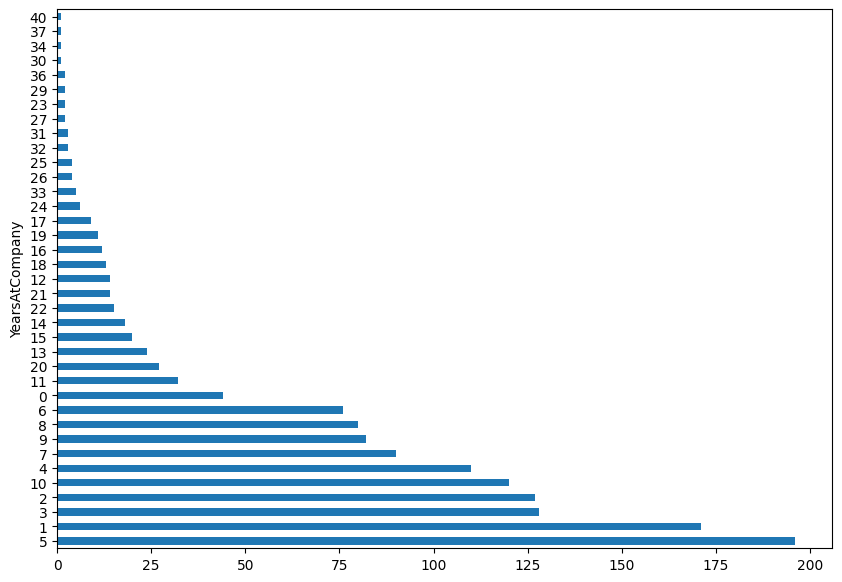

In [267]:
print(df['YearsAtCompany'].value_counts())
print("Пропуски:", sum(pd.isnull(df['YearsAtCompany'])))

df['YearsAtCompany'].value_counts().plot(kind='barh', figsize=(10, 7))

# Стаж в текущей должности (YearsInCurrentRole)

YearsInCurrentRole
2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='YearsInCurrentRole'>

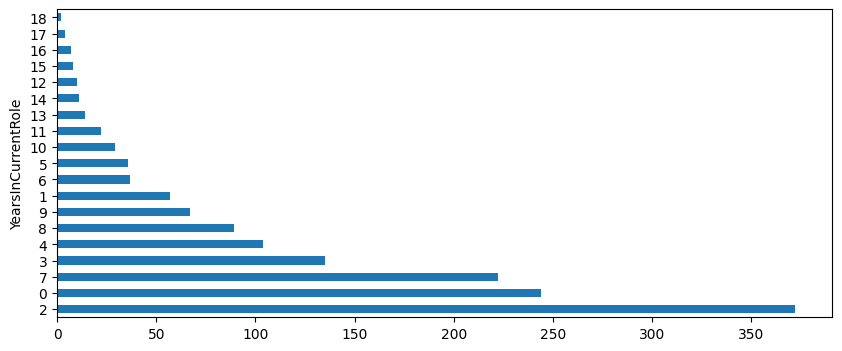

In [268]:
print(df['YearsInCurrentRole'].value_counts())
print("Пропуски:", sum(pd.isnull(df['YearsInCurrentRole'])))

df['YearsInCurrentRole'].value_counts().plot(kind='barh', figsize=(10, 4))

# Лет с последнего повышения (YearsSinceLastPromotion)

YearsSinceLastPromotion
0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: count, dtype: int64
Пропуски: 0


<Axes: ylabel='YearsSinceLastPromotion'>

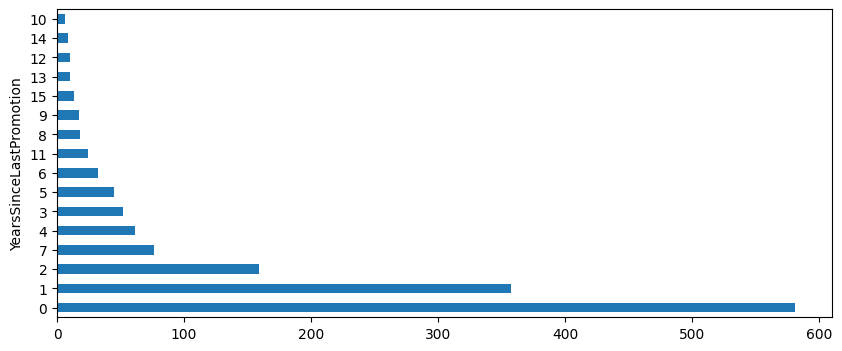

In [269]:
print(df['YearsSinceLastPromotion'].value_counts())
print("Пропуски:", sum(pd.isnull(df['YearsSinceLastPromotion'])))

df['YearsSinceLastPromotion'].value_counts().plot(kind='barh', figsize=(10, 4))

# Стаж с текущим руководителем (YearsWithCurrManager)

YearsWithCurrentManager
2.0     328
0.0     252
7.0     210
3.0     138
8.0      99
4.0      94
1.0      75
9.0      61
5.0      30
6.0      29
10.0     27
11.0     21
12.0     17
13.0     14
17.0      6
15.0      5
14.0      5
16.0      2
Name: count, dtype: int64
Пропуски: 57


<Axes: ylabel='YearsWithCurrentManager'>

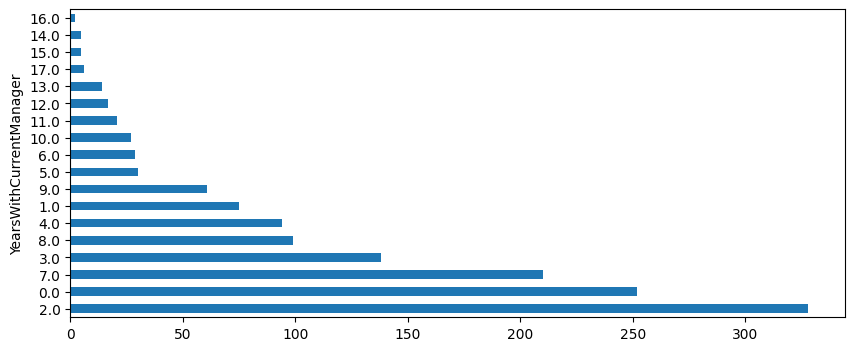

In [270]:
# Переименнуем YearsWithCurrManager в YearsWithCurrentManager

df = df.rename(columns={'YearsWithCurrManager': 'YearsWithCurrentManager'})

print(df['YearsWithCurrentManager'].value_counts())
print("Пропуски:", sum(pd.isnull(df['YearsWithCurrentManager'])))

df['YearsWithCurrentManager'].value_counts().plot(kind='barh', figsize=(10, 4))

# В столбце есть 57 пропусков, в других столбцах пропусков не было, так что можем просто 
# удалить ВСЕ строки с пустыми ячейками при помощи .dropna() без уточнения столбца.

In [271]:
# Однако для чистоты удалим строки только с пропусками в столбце YearsWithCurrentManager
df = df.dropna(subset=['YearsWithCurrentManager'])
print(df['YearsWithCurrentManager'].value_counts())
print("Пропуски:", sum(pd.isnull(df['YearsWithCurrentManager'])))

YearsWithCurrentManager
2.0     328
0.0     252
7.0     210
3.0     138
8.0      99
4.0      94
1.0      75
9.0      61
5.0      30
6.0      29
10.0     27
11.0     21
12.0     17
13.0     14
17.0      6
15.0      5
14.0      5
16.0      2
Name: count, dtype: int64
Пропуски: 0


# Сравниваем датасет после чистки

In [272]:
# Выводим информацю о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1413 entries, 0 to 1479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1413 non-null   object 
 1   Age                       1413 non-null   int64  
 2   AgeGroup                  1413 non-null   object 
 3   Attrition                 1413 non-null   object 
 4   BusinessTravel            1413 non-null   object 
 5   DailyRate                 1413 non-null   int64  
 6   Department                1413 non-null   object 
 7   DistanceFromHome          1413 non-null   int64  
 8   Education                 1413 non-null   int64  
 9   EducationField            1413 non-null   object 
 10  EmployeeNumber            1413 non-null   int64  
 11  EnvironmentSatisfaction   1413 non-null   int64  
 12  Gender                    1413 non-null   object 
 13  HourlyRate                1413 non-null   int64  
 14  JobInvolvemen

In [ ]:
data_len_finish=df.shape[0]
print("Строк в исходном наборе:",data_len_start)
print("Строк в наборе после обработки:",data_len_finish)
print("Пустых ячеек:", df.isna().sum().sum())

Строк в исходном наборе: 1480
Строк в наборе после обработки: 1413
Пустых ячеек: 0
